In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt



In [69]:
print(os.listdir('C:/Users/MikeK/GoIT'))
df = pd.read_csv('C:/Users/MikeK/GoIT/bestsellers with categories.csv')

['.ipynb_checkpoints', '2017_jun_final - 2017_jun_final.csv', 'bestsellers with categories.csv', 'HW1.ipynb', 'Hw2.1.ipynb', 'Hw2.2.ipynb', 'Hw2.3.ipynb', 'processed_data.csv', 'Untitled.ipynb']


In [71]:
# Вивести перші п'ять рядків
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [73]:
# Вивести розміри датасету
df.shape

(550, 7)

In [75]:
# Про скільки книг зберігає дані датасет?
# num_unique_books = len(df['Name'].unique())
num_unique_books = df['Name'].nunique()

print(f"Відповідь: Датасет зберігає дані про {num_unique_books} книг.")

Відповідь: Датасет зберігає дані про 351 книг.


In [77]:
# Змінити назви стовпців
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [79]:
# Перевірка на пропуски
missing_data = df.isna().sum()

print(f"Відповідь: {'Так' if missing_data.any() else 'Ні'}, пропусків немає.")

Відповідь: Ні, пропусків немає.


In [81]:
# Унікальні значення в колонці genre
unique_genres = df['genre'].unique()

print(f"Відповідь: Унікальні жанри - {', '.join(unique_genres)}.")

Відповідь: Унікальні жанри - Non Fiction, Fiction.


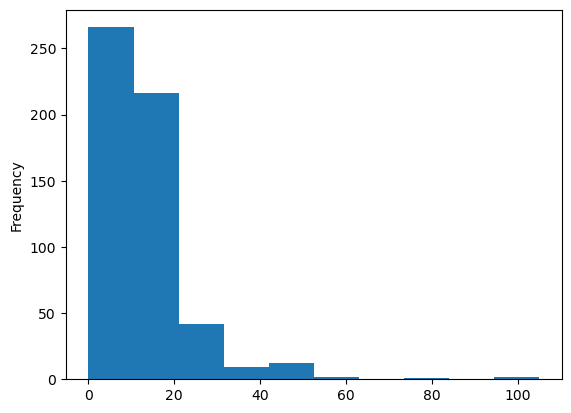

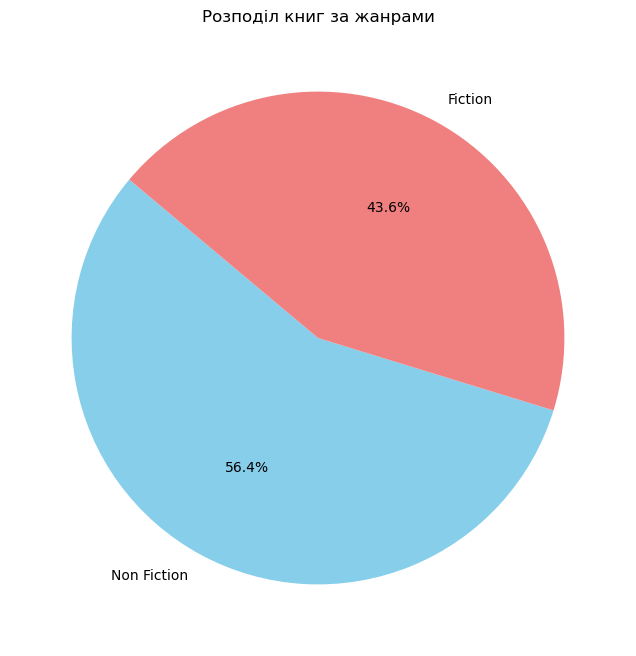

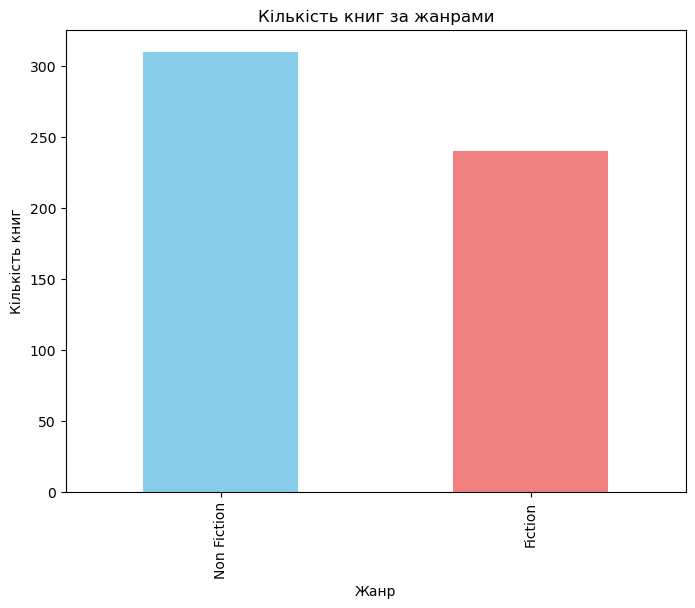

In [95]:
# Діаграма розподілу цін
df['price'].plot(kind='hist')



genre_counts = df['genre'].value_counts()

plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])

# Додаткові налаштування для краси
plt.title('Розподіл книг за жанрами')
plt.ylabel('')

# Показати діаграму
plt.show()

plt.figure(figsize=(8, 6))
genre_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Кількість книг за жанрами')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')

plt.show()






In [97]:
# Визначення статистичних показників цін
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Відповідь: Максимальна ціна: {max_price}")
print(f"Відповідь: Мінімальна ціна: {min_price}")
print(f"Відповідь: Середня ціна: {mean_price:.2f}")
print(f"Відповідь: Медіанна ціна: {median_price}")

Відповідь: Максимальна ціна: 105
Відповідь: Мінімальна ціна: 0
Відповідь: Середня ціна: 13.10
Відповідь: Медіанна ціна: 11.0


In [99]:
# Який рейтинг у датасеті найвищий?
max_rating = df['user_rating'].max()

print(f"Відповідь: Найвищий рейтинг у датасеті - {max_rating}.")

Відповідь: Найвищий рейтинг у датасеті - 4.9.


In [101]:
# Скільки книг мають найвищий рейтинг?
count_max_rating = df[df['user_rating'] == max_rating].shape[0]

print(f"Відповідь: {count_max_rating} книг мають найвищий рейтинг.")

Відповідь: 52 книг мають найвищий рейтинг.


In [103]:
# Яка книга має найбільше відгуків?
most_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]

print(f"Відповідь: Книга з найбільшою кількістю відгуків - '{most_reviews_book}'.")

Відповідь: Книга з найбільшою кількістю відгуків - 'Where the Crawdads Sing'.


In [127]:
# Яка книга найдорожча у 2015 році?
top_2015 = df[df['year'] == 2015]
most_expensive_2015 = top_2015[top_2015['price'] == top_2015['price'].max()]['name'].values[0]
most_expensive_2015_price = top_2015[top_2015['price'] == top_2015['price'].max()]['price'].values[0]

print(f"Відповідь: Найдорожча книга у 2015 році - '{most_expensive_2015}'. Її ціна склала - {most_expensive_2015_price}")

Відповідь: Найдорожча книга у 2015 році - 'Publication Manual of the American Psychological Association, 6th Edition'. Її ціна склала - 46


In [129]:
# Скільки книг жанру Fiction у 2010 році?
fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]

print(f"Відповідь: {fiction_2010} книг жанру Fiction у 2010 році.")

Відповідь: 20 книг жанру Fiction у 2010 році.


In [143]:
# Скільки книг з рейтингом 4.9 у 2010 та 2011 роках?
books_49_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
rating_49_2010_2011 = books_49_2010_2011.shape[0]
rating_49_2010_2011_books = books_49_2010_2011['name'].unique()

print(f"Відповідь: {rating_49_2010_2011} книг з рейтингом 4.9 у 2010 та 2011 роках, і ці книги:")
for book in rating_49_2010_2011_books:
    print(book)

Відповідь: 1 книг з рейтингом 4.9 у 2010 та 2011 роках, і ці книги:
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)


In [145]:
# Яка книга остання у відсортованому списку?
sorted_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_sorted_book = sorted_books_2015.iloc[-1]['name']

print(f"Відповідь: Остання книга у відсортованому списку - '{last_sorted_book}'.")

Відповідь: Остання книга у відсортованому списку - 'Old School (Diary of a Wimpy Kid #10)'.


In [160]:
# Максимальна та мінімальна ціна для кожного жанру
df_filtered = df[df['price'] > 0]

genre_price_stats_filtered = df_filtered.groupby('genre')['price'].agg(['min', 'max'])

max_fiction_price = genre_price_stats_filtered.loc['Fiction', 'max']
min_fiction_price = genre_price_stats_filtered.loc['Fiction', 'min']
max_non_fiction_price = genre_price_stats_filtered.loc['Non Fiction', 'max']
min_non_fiction_price = genre_price_stats_filtered.loc['Non Fiction', 'min']

print(f"Відповідь: Максимальна ціна для жанру Fiction: {max_fiction_price}")
print(f"Відповідь: Мінімальна ціна для жанру Fiction (більша за 0): {min_fiction_price}")
print(f"Відповідь: Максимальна ціна для жанру Non Fiction: {max_non_fiction_price}")
print(f"Відповідь: Мінімальна ціна для жанру Non Fiction (більша за 0): {min_non_fiction_price}")


Відповідь: Максимальна ціна для жанру Fiction: 82
Відповідь: Мінімальна ціна для жанру Fiction (більша за 0): 2
Відповідь: Максимальна ціна для жанру Non Fiction: 105
Відповідь: Мінімальна ціна для жанру Non Fiction (більша за 0): 1


In [164]:
# Кількість книг для кожного автора
author_books_count = df.groupby('author')['name'].count().reset_index().rename(columns={'name': 'book_count'})

table_shape = author_books_count.shape
top_author = author_books_count.loc[author_books_count['book_count'].idxmax()]
top_author_name = top_author['author']
top_author_count = top_author['book_count']

print(f"Відповідь: Якої розмірності вийшла таблиця? {table_shape}")
print(f"Відповідь: Автор, який має найбільше книг: {top_author_name} і у нього {top_author_count} книг.")
# print(f"Відповідь: Скільки книг цього автора? {top_author_count}")

Відповідь: Якої розмірності вийшла таблиця? (248, 2)
Відповідь: Автор, який має найбільше книг: Jeff Kinney і у нього 12 книг.


In [170]:
# Середній рейтинг для кожного автора
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index().rename(columns={'user_rating': 'avg_rating'})

min_avg_rating_author = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin()]
min_avg_rating_author_name = min_avg_rating_author['author']
min_avg_rating_author_rating = min_avg_rating_author['avg_rating']

print(f"Відповідь: У {min_avg_rating_author_name} мінімальний середній рейтинг - {min_avg_rating_author_rating:.2f}")
# print(f"Відповідь: Який у цього автора середній рейтинг? {min_avg_rating_author_rating:.2f}")

Відповідь: У Donna Tartt мінімальний середній рейтинг - 3.90


In [172]:
# Об'єднання двох DataFrame
combined_author_data = pd.concat([author_books_count.set_index('author'), author_avg_rating.set_index('author')], axis=1).reset_index()
combined_author_data

,author,book_count,avg_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [174]:
# Сортування DataFrame за зростанням кількості книг та рейтингу
sorted_combined_author_data = combined_author_data.sort_values(by=['book_count', 'avg_rating'])
first_author = sorted_combined_author_data.iloc[0]['author']

print


<function print(*args, sep=' ', end='\n', file=None, flush=False)>